## **e-Commerce Analysis:**

#### **Import Libraries:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

#### **Import Raw Data:**

In [3]:
df = pd.read_csv("C:/Users/Apurba Mandal/Documents/Portfolio/e-Commerce/Orders_csv.csv", encoding="windows-1252")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Delivery Duration,Ship Mode,Customer ID,Customer Name,Segment,Country,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Discount Value,Profit,COGS
0,1,CA-2016-152156,08-11-2016,11-11-2016,3,Second Class,CG-12520,Claire Gute,Consumer,United States,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,0.00,41.91,-220.05
1,2,CA-2016-152156,08-11-2016,11-11-2016,3,Second Class,CG-12520,Claire Gute,Consumer,United States,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,0.00,219.58,-512.36
2,3,CA-2016-138688,12-06-2016,16-06-2016,4,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,0.00,6.87,-7.75
3,4,US-2015-108966,11-10-2015,18-10-2015,7,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5,0.45,-430.91,-383.03,-909.70
4,5,US-2015-108966,11-10-2015,18-10-2015,7,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2,0.20,-4.47,2.52,-15.38


In [5]:
df.shape

(9994, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Row ID             9994 non-null   int64  
 1   Order ID           9994 non-null   object 
 2   Order Date         9994 non-null   object 
 3   Ship Date          9994 non-null   object 
 4   Delivery Duration  9994 non-null   int64  
 5   Ship Mode          9994 non-null   object 
 6   Customer ID        9994 non-null   object 
 7   Customer Name      9994 non-null   object 
 8   Segment            9994 non-null   object 
 9   Country            9994 non-null   object 
 10  City               9994 non-null   object 
 11  State              9994 non-null   object 
 12  Postal Code        9994 non-null   int64  
 13  Region             9994 non-null   object 
 14  Product ID         9994 non-null   object 
 15  Category           9994 non-null   object 
 16  Sub-Category       9994 

#### **Data Cleaning:**

In [6]:
obj = (df.dtypes =='object')
object_cols = list(obj[obj].index)

unique_values = {}
for col in object_cols:
    unique_values[col] = df[col].unique().size
unique_values    
    

{'Order ID': 5009,
 'Order Date': 1237,
 'Ship Date': 1334,
 'Ship Mode': 4,
 'Customer ID': 793,
 'Customer Name': 793,
 'Segment': 3,
 'Country': 1,
 'City': 531,
 'State': 49,
 'Region': 4,
 'Product ID': 1862,
 'Category': 3,
 'Sub-Category': 17,
 'Product Name': 1850}

#### **KPIs Requirement:**

In [15]:
Total_Sales = df['Sales'].sum()
print(f"Total Sales $: {Total_Sales:.2f}M")

Total Sales $: 2297201.07M


In [16]:
Total_Profit = df['Profit'].sum()
print(f"Total Profit $: {Total_Profit:.2f}M")

Total Profit $: 286397.79M


In [17]:
No_of_item_sold = df['Quantity'].sum()
print(f"No of Item Sold: {No_of_item_sold:.2f}")

No of Item Sold: 37873.00


In [19]:
Avg_Delivery_Day = df['Delivery Duration'].mean()
print(f"Average Delivery Day : {Avg_Delivery_Day:.2f}")

Average Delivery Day : 3.96


In [20]:
Avg_Order = df['Quantity'].mean()
print(f"Average Order : {Avg_Order:.2f}")

Average Order : 3.79


In [25]:
Profit_Margin= (df['Profit'].sum() / df['Sales'].sum()) * 100
print(f"Profit Margin: {Profit_Margin:.2f}%")

Profit Margin: 12.47%


#### **Chart Representation:**

##### **Sales by Category:**

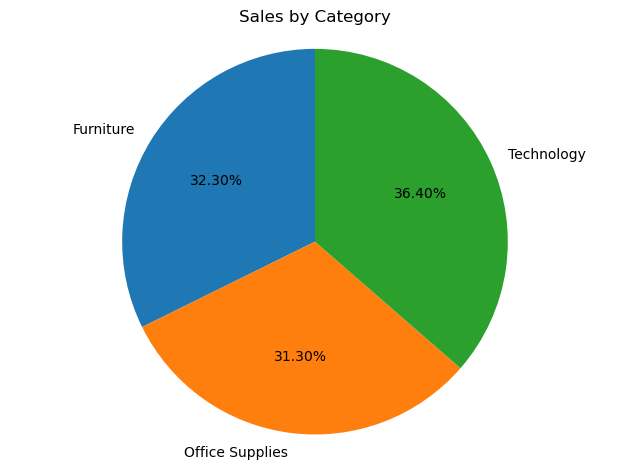

In [13]:
Sales_by_Category = df.groupby('Category')['Sales'].sum()
plt.pie(Sales_by_Category,labels = Sales_by_Category.index,
        autopct = '%.2f%%',
        startangle = 90)
plt.title('Sales by Category')
plt.axis('equal')
plt.tight_layout()
plt.show()

##### **Sales by Sub-Category:**

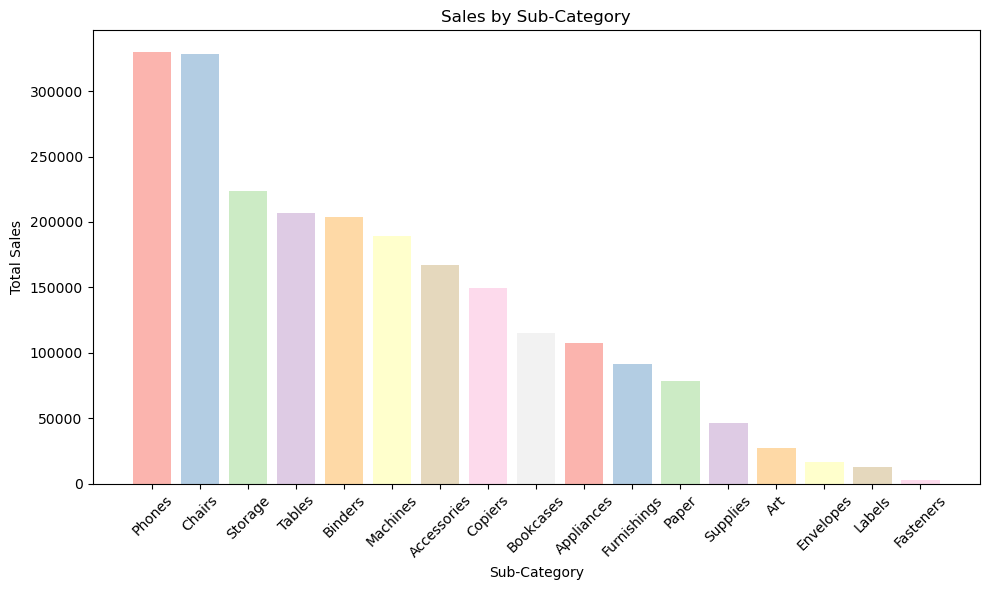

In [50]:
Sales_by_SubCategory = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize = (10,6))
pastel = plt.cm.Pastel1.colors 
bars = plt.bar(Sales_by_SubCategory.index,Sales_by_SubCategory.values,color=pastel)
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales')
plt.title('Sales by Sub-Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### **Sales by Segment:**

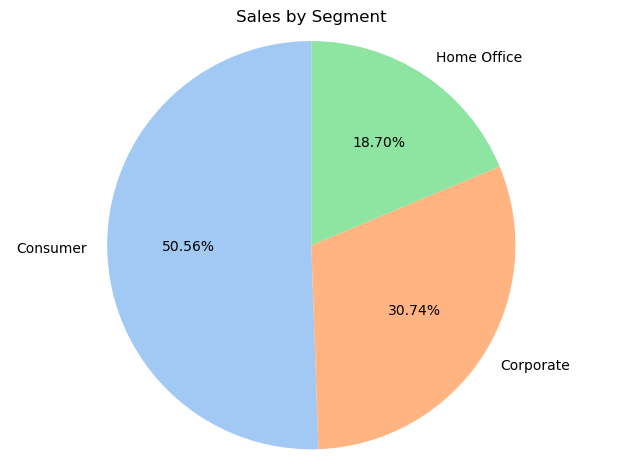

In [12]:
Sales_by_Segment = df.groupby('Segment')['Sales'].sum() 
plt.pie(Sales_by_Segment,labels = Sales_by_Segment.index, colors=sns.color_palette('pastel'),
        autopct = '%.2f%%',
        startangle = 90)
plt.title('Sales by Segment')
plt.axis('equal')
plt.tight_layout()
plt.show()

##### **Sales summary by Region:**

In [15]:
Summary_by_Region = df.groupby('Region').agg(
    Total_Sales = ('Sales','sum'),
    Average_Sales = ('Sales','mean'),
    Total_Profit = ('Profit','sum'),
    No_of_Order = ('Quantity', 'count')
).reset_index()
print(Summary_by_Region)

    Region  Total_Sales  Average_Sales  Total_Profit  No_of_Order
0  Central    501239.88     215.772656      39706.45         2323
1     East    678781.36     238.336152      91522.84         2848
2    South    391721.90     241.803642      46749.71         1620
3     West    725457.93     226.493266     108418.79         3203


##### **Order by Ship Mode:**

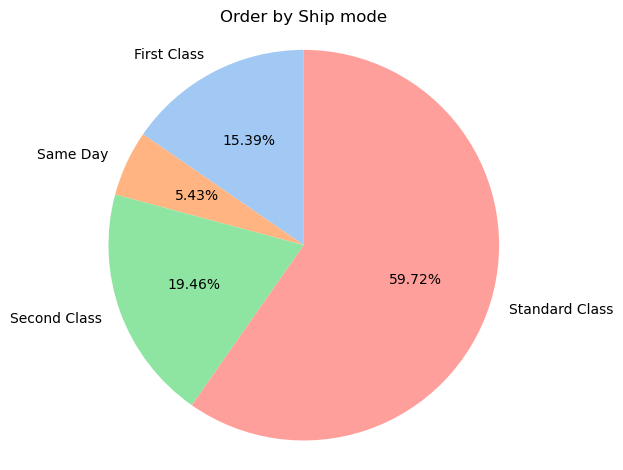

In [24]:
Order_by_Ship_Mode = df.groupby('Ship Mode')['Quantity'].count() 
plt.pie(Order_by_Ship_Mode,labels = Order_by_Ship_Mode.index, colors=sns.color_palette('pastel'),
        autopct = '%.2f%%',
        startangle = 90)
plt.title('Order by Ship mode')
plt.axis('equal')
plt.tight_layout()
plt.show()

##### **Order by Segment:**

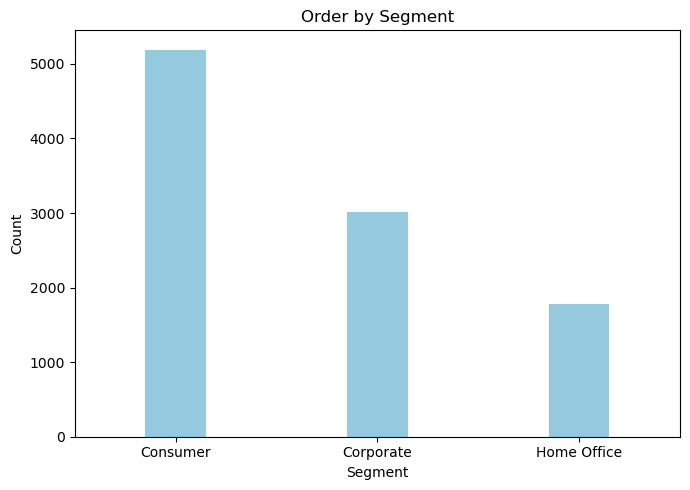

In [21]:
Order_by_Segment = df.groupby('Segment')['Quantity'].count() 
plt.figure (figsize = (7,5))
sns.barplot (x=Order_by_Segment.index,y=Order_by_Segment,color='skyblue',width=0.3);
plt.xlabel('Segment')
plt.ylabel('Count')
plt.title ('Order by Segment')
plt.tight_layout()
plt.show()

##### **Top and Bottom States by Orders:**

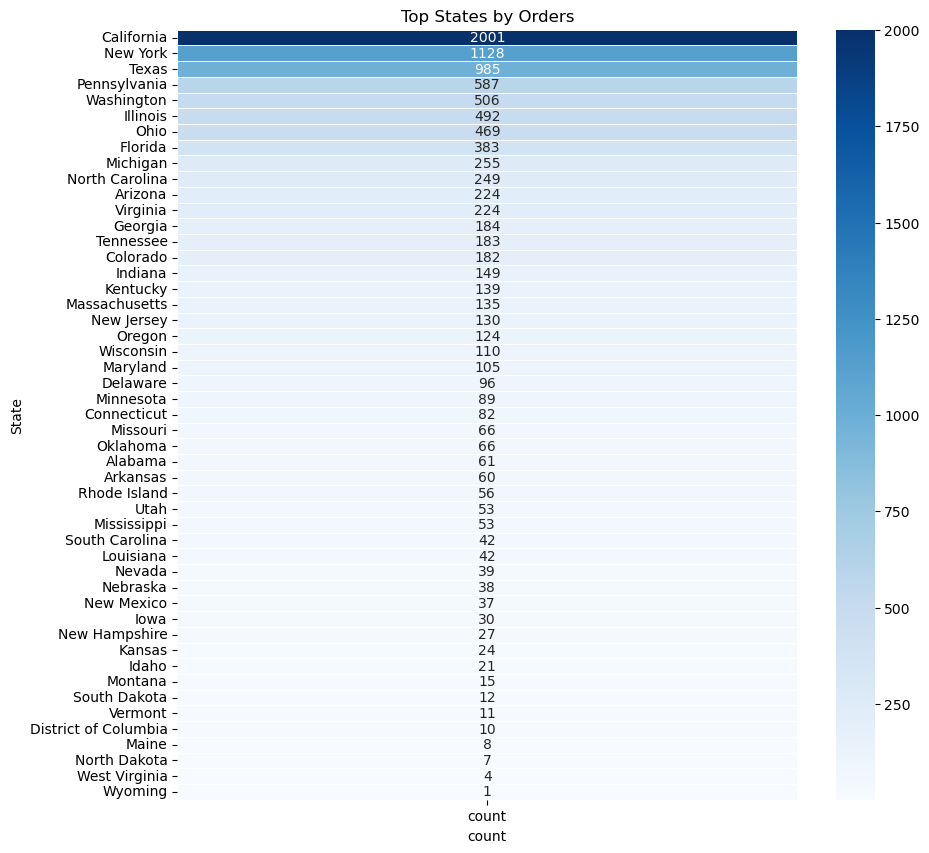

In [31]:
plt.figure(figsize=(10,10))
State_count = df['State'].value_counts().head(50)
sns.heatmap(State_count.to_frame(),annot = True, cmap = "Blues", linewidth = 0.5, fmt= 'd')
plt.title('Top States by Orders')
plt.xlabel('count')
plt.ylabel('State')
plt.show()

##### **Top 5 Customer:**

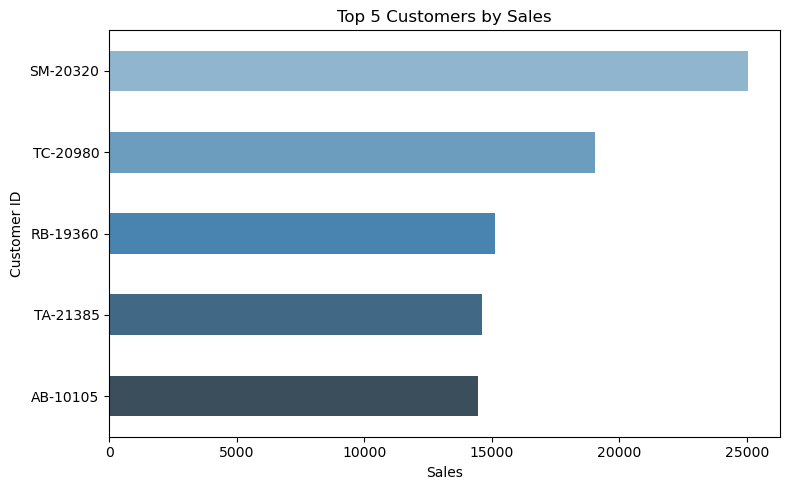

In [56]:
top_customers = df.groupby('Customer ID')['Sales'].sum().reset_index()
top_customers.columns = ['Customer ID', 'Sales']
top_5 = top_customers.sort_values(by='Sales', ascending=False).head(5)
plt.figure(figsize=(8, 5))
sns.barplot(x='Sales', y='Customer ID', data=top_5, palette='Blues_d',width=0.5)
plt.title('Top 5 Customers by Sales')
plt.xlabel('Sales')
plt.ylabel('Customer ID')
plt.tight_layout()
plt.show()

##### **Bottom 5 Customer:**

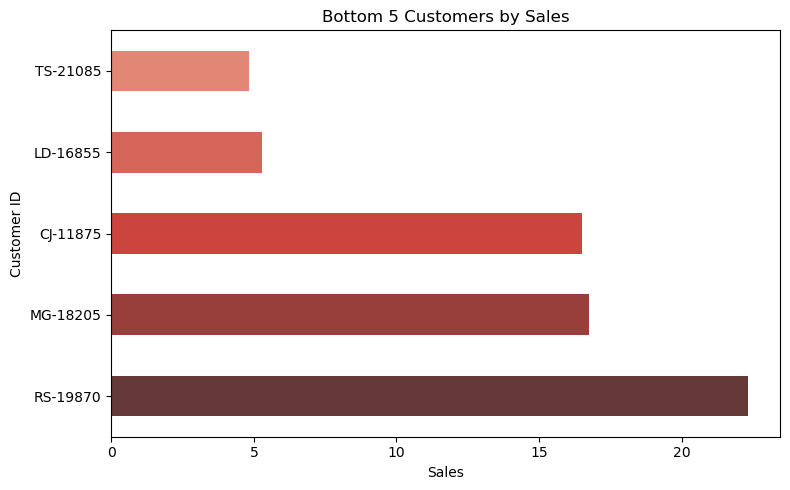

In [57]:
bottom_customers = df.groupby('Customer ID')['Sales'].sum().reset_index()
bottom_customers.columns = ['Customer ID', 'Sales']
bottom_5 = bottom_customers.sort_values(by='Sales', ascending=True).head(5)
plt.figure(figsize=(8, 5))
sns.barplot(x='Sales', y='Customer ID', data=bottom_5, palette='Reds_d',width=0.5)
plt.title('Bottom 5 Customers by Sales')
plt.xlabel('Sales')
plt.ylabel('Customer ID')
plt.tight_layout()
plt.show()